# Part1: Exploratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
data = pd.read_csv("./titanic/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### How many Survived?

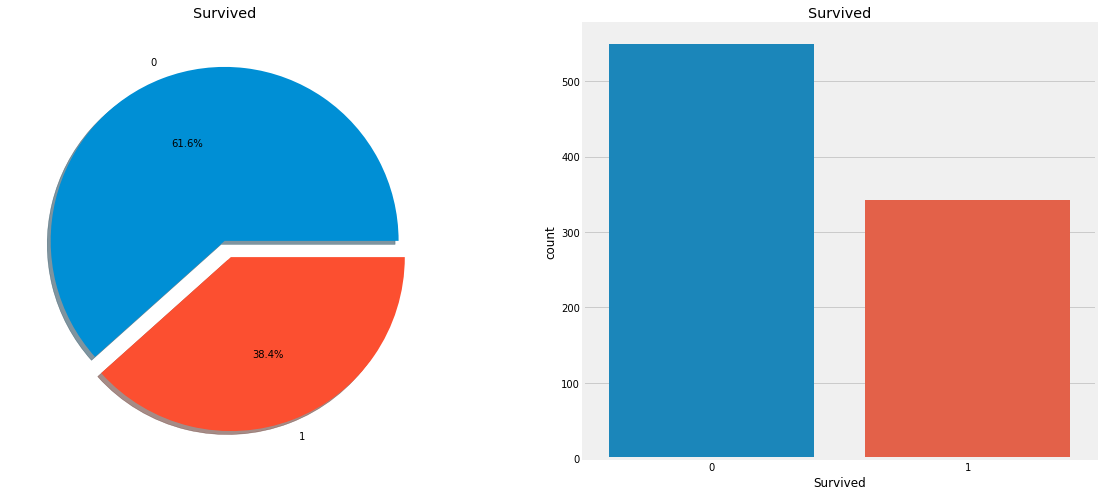

In [4]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct="%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title("Survived")
ax[0].set_ylabel('')
sns.countplot("Survived", data=data, ax=ax[1])
ax[1].set_title("Survived")
plt.show()

## Type Of Features
* Categorical Features:
    + Sex, Embarked
* Ordinal Features:
    + PClass
* Continous Feature:
    + Age
    
## Analysing The Feature

## Sex to Categorical Feature

In [5]:
data.groupby(["Sex", "Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

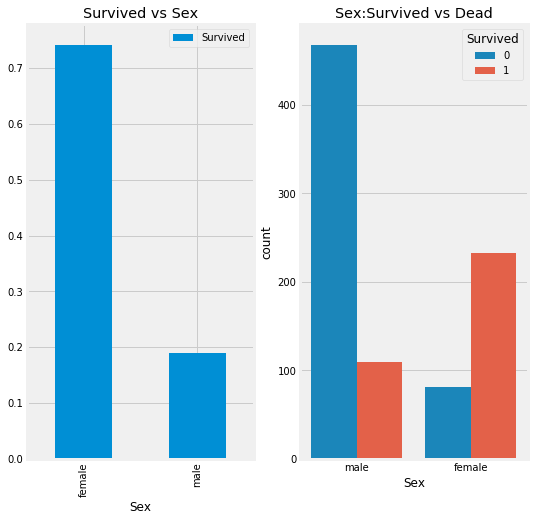

In [6]:
f, ax = plt.subplots(1, 2, figsize=(8, 8))
data[["Sex", "Survived"]].groupby(["Sex"]).mean().plot.bar(ax=ax[0])
ax[0].set_title("Survived vs Sex")
sns.countplot("Sex", hue="Survived", data=data, ax=ax[1])
ax[1].set_title("Sex:Survived vs Dead")
plt.show()

## Pclass to Ordinal Feature

In [7]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap="summer_r")

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


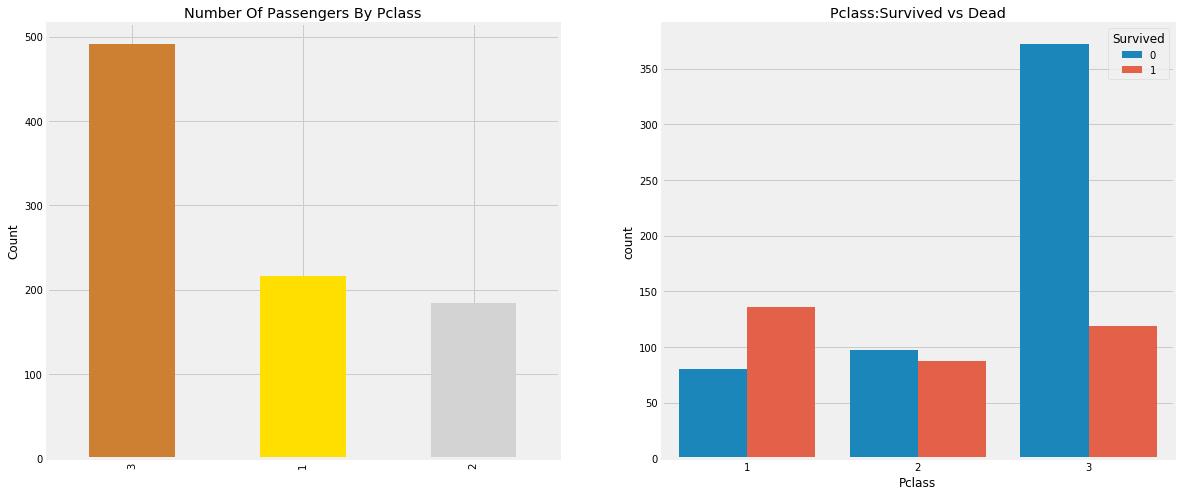

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data["Pclass"].value_counts().plot.bar(color=["#CD7F32", "#FFDF00", "#D3D3D3"], ax = ax[0])
ax[0].set_title("Number Of Passengers By Pclass")
ax[0].set_ylabel("Count")
sns.countplot("Pclass", hue="Survived", data=data, ax=ax[1])
ax[1].set_title("Pclass:Survived vs Dead")
plt.show()

#### Sex and Pclass

In [9]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap="summer_r")

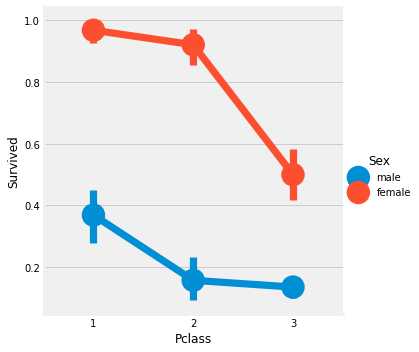

In [10]:
sns.factorplot("Pclass", "Survived", hue="Sex", data=data)
plt.show()

## Age to Continous Feature

In [11]:
print(f"Oldest Passenger was of: {data['Age'].max()} Years")
print(f"Youngest Passenger was of: {data['Age'].min()} Years")
print(f"Average Passenger was of: {data['Age'].mean()} Years")

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Passenger was of: 29.69911764705882 Years


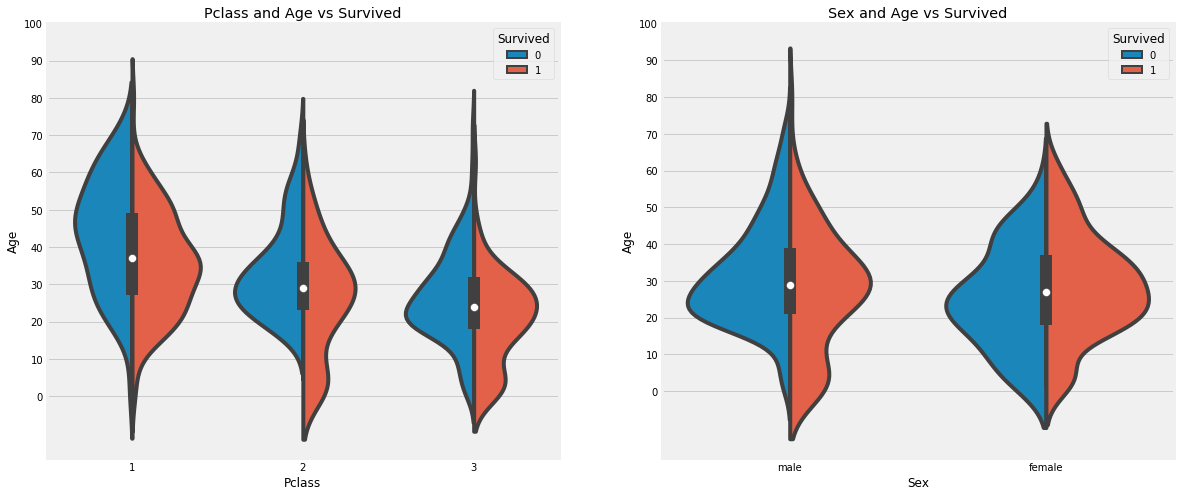

In [12]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot("Pclass", "Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("Sex", "Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0, 110, 10))

plt.show()

#### "What's In A Name?" to Feature :p

In [13]:
data["Initial"] = 0
for _ in data:
    data["Initial"] = data.Name.str.extract("([A-Za-z]+)\.")

In [14]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap="summer_r")

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [15]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [16]:
data.groupby("Initial")["Age"].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### Filing NaN Ages

In [17]:
data["Age"].fillna(
    data.groupby("Initial")["Age"].transform("mean"), inplace=True
)

In [18]:
data.Age.isnull().any()

False

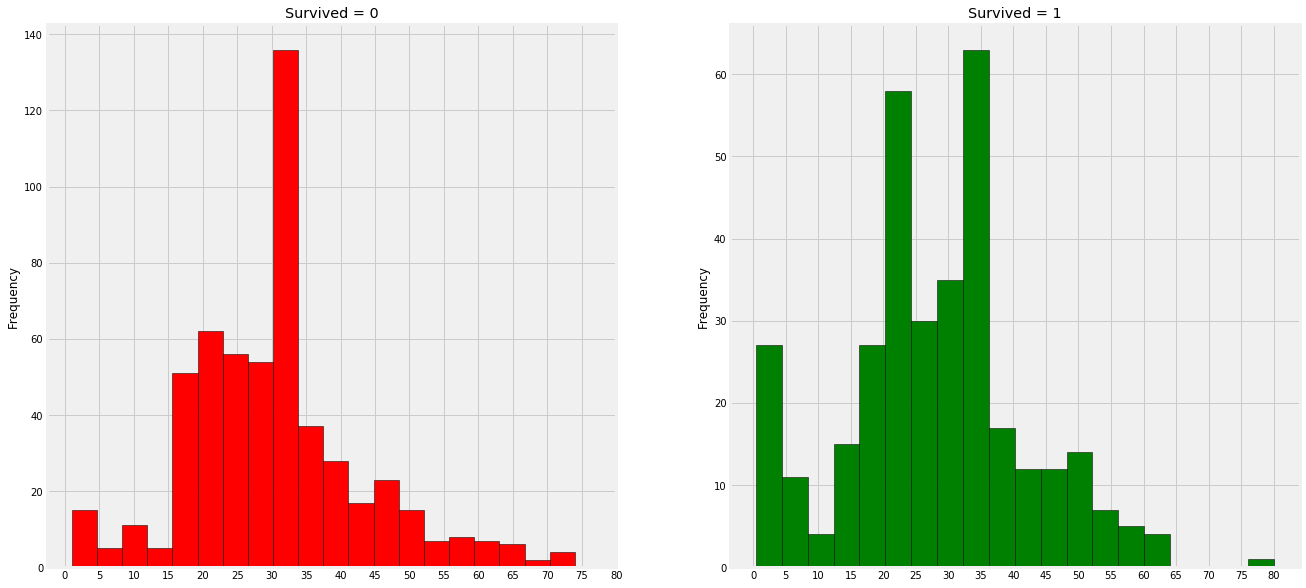

In [19]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
data[data["Survived"] == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor="black", color="red")
ax[0].set_title("Survived = 0")
x1=list(range(0, 85, 5))
ax[0].set_xticks(x1)

data[data["Survived"] == 1].Age.plot.hist(ax=ax[1], bins=20, edgecolor="black", color="green")
ax[1].set_title("Survived = 1")
x2=list(range(0, 85, 5))
ax[1].set_xticks(x2)

plt.show()

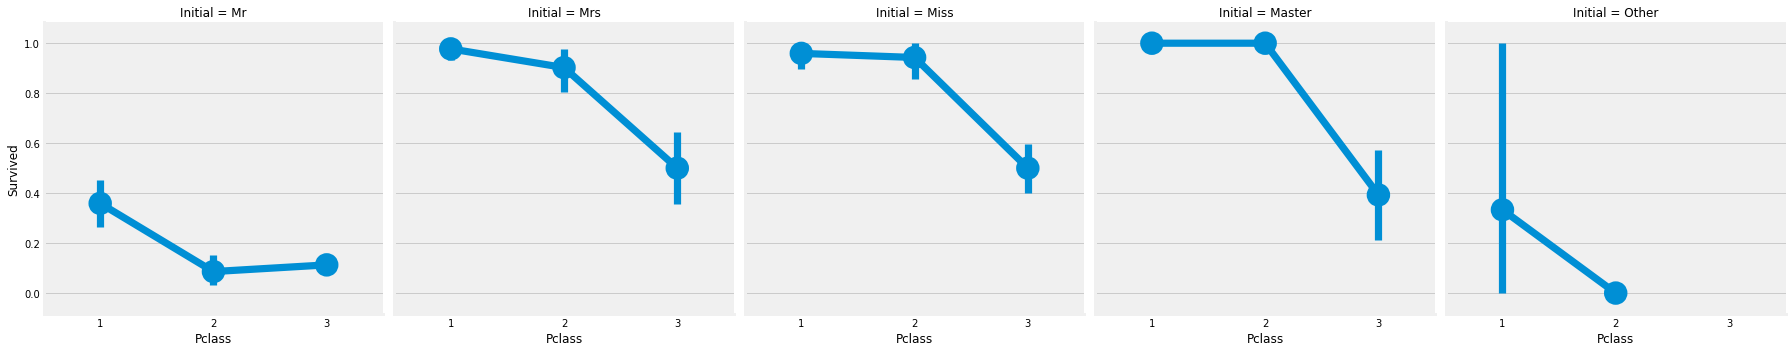

In [20]:
sns.factorplot("Pclass", "Survived", col="Initial", data=data)
plt.show()
#The Women and Child first policy thus holds true irrespective of the class.

## Embarked to Categorical Value

In [21]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap="summer_r")

#### Chances for Survival by Port Of Embarkation

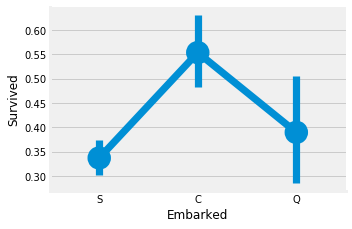

In [22]:
sns.factorplot("Embarked", "Survived", data=data)
fig=plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

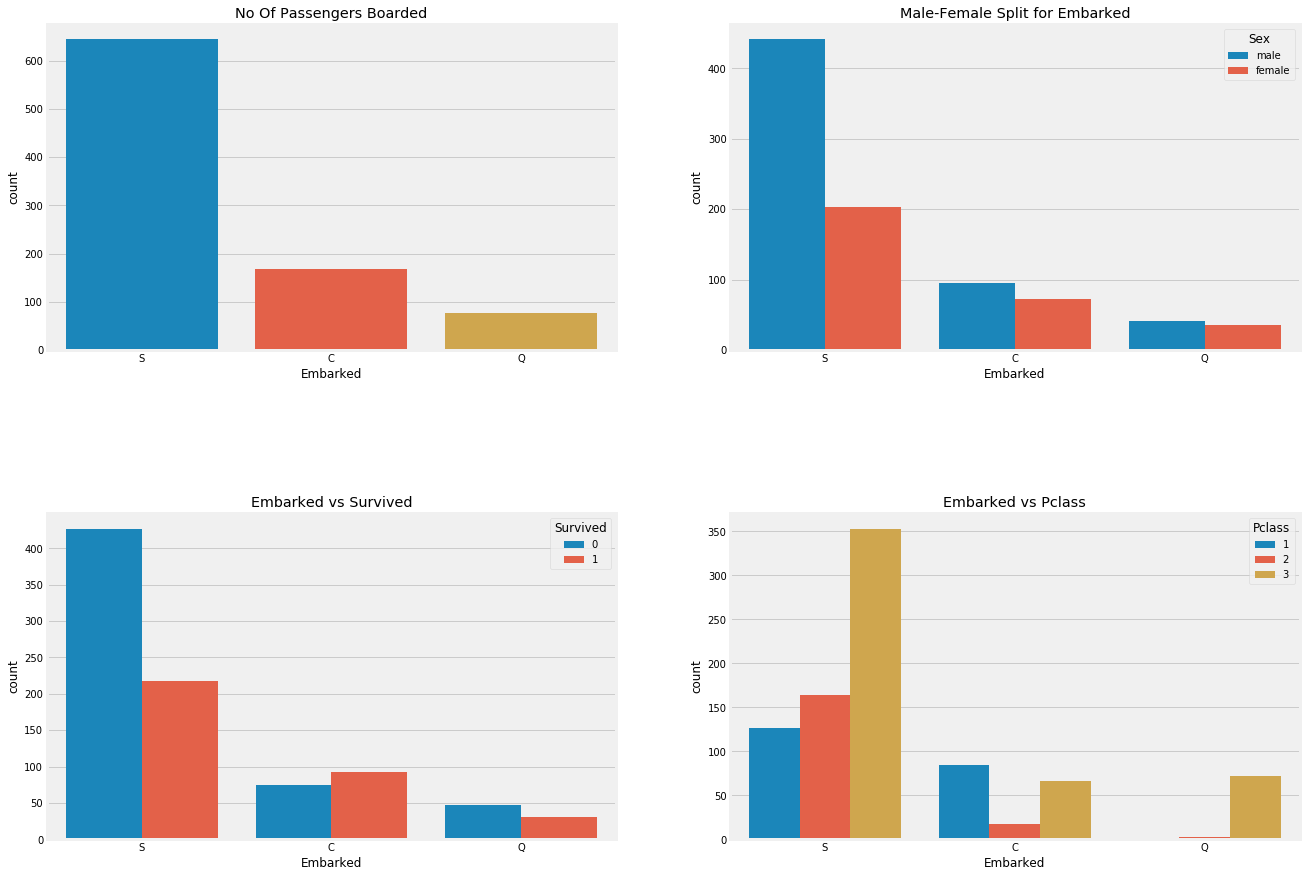

In [23]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot("Embarked", data=data, ax=ax[0, 0])
ax[0, 0].set_title("No Of Passengers Boarded")

sns.countplot("Embarked", hue="Sex", data=data, ax=ax[0, 1])
ax[0, 1].set_title("Male-Female Split for Embarked")

sns.countplot("Embarked", hue="Survived", data=data, ax=ax[1, 0])
ax[1, 0].set_title("Embarked vs Survived")

sns.countplot("Embarked", hue="Pclass", data=data, ax=ax[1, 1])
ax[1, 1].set_title("Embarked vs Pclass")
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

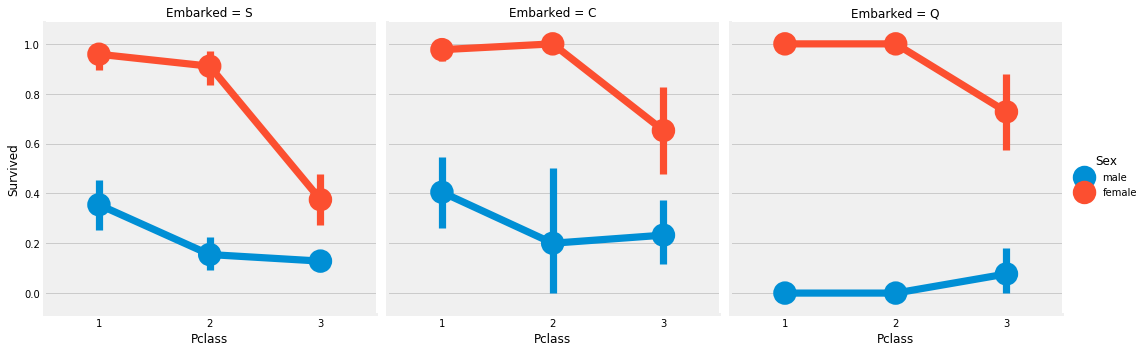

In [24]:
sns.factorplot("Pclass", "Survived", hue="Sex", col="Embarked", data=data)
plt.show()

#### Filling Embarked NaN

In [25]:
data["Embarked"].fillna("S", inplace=True)

In [26]:
data.Embarked.isnull().any()

False

## SibSp to Discrete Feature

In [27]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap="summer_r")

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


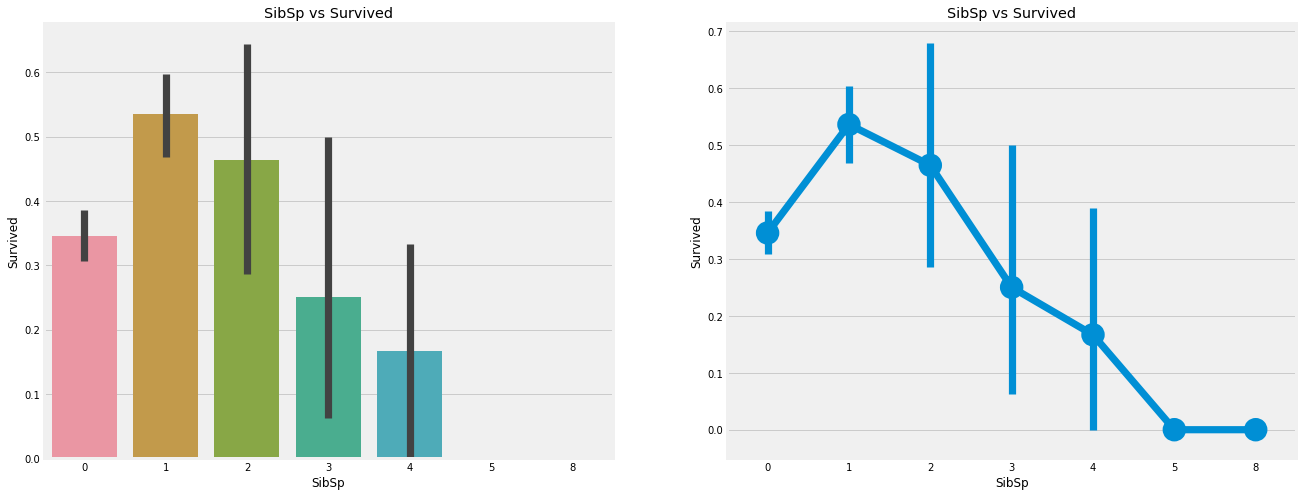

In [28]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot("SibSp", "Survived", data=data, ax=ax[0])
ax[0].set_title("SibSp vs Survived")

sns.factorplot("SibSp", "Survived", data=data, ax=ax[1])
ax[1].set_title("SibSp vs Survived")
plt.close(2)
plt.show()

In [29]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap="summer_r")

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


## Parch

In [30]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap="summer_r")

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


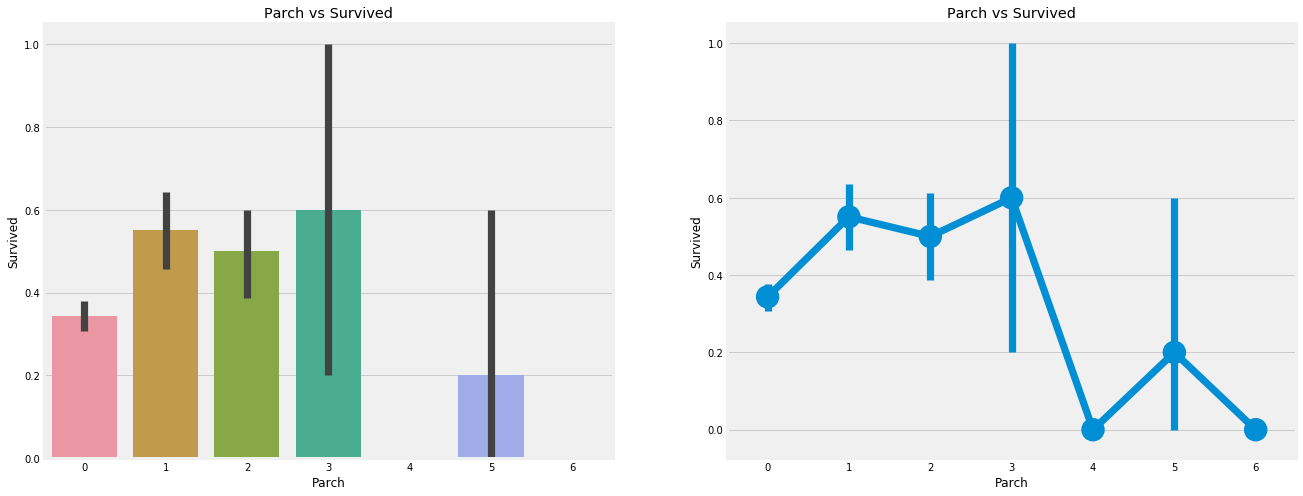

In [31]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot("Parch", "Survived", data=data, ax=ax[0])
ax[0].set_title("Parch vs Survived")

sns.factorplot("Parch", "Survived", data=data, ax=ax[1])
ax[1].set_title("Parch vs Survived")
plt.close(2)
plt.show()

## Fare to Continous Feature

In [32]:
print(f"Highest Fare was: {data['Fare'].max()}")
print(f"Lowest Fare was: {data['Fare'].min()}")
print(f"Average Fare was: {data['Fare'].mean()}")

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


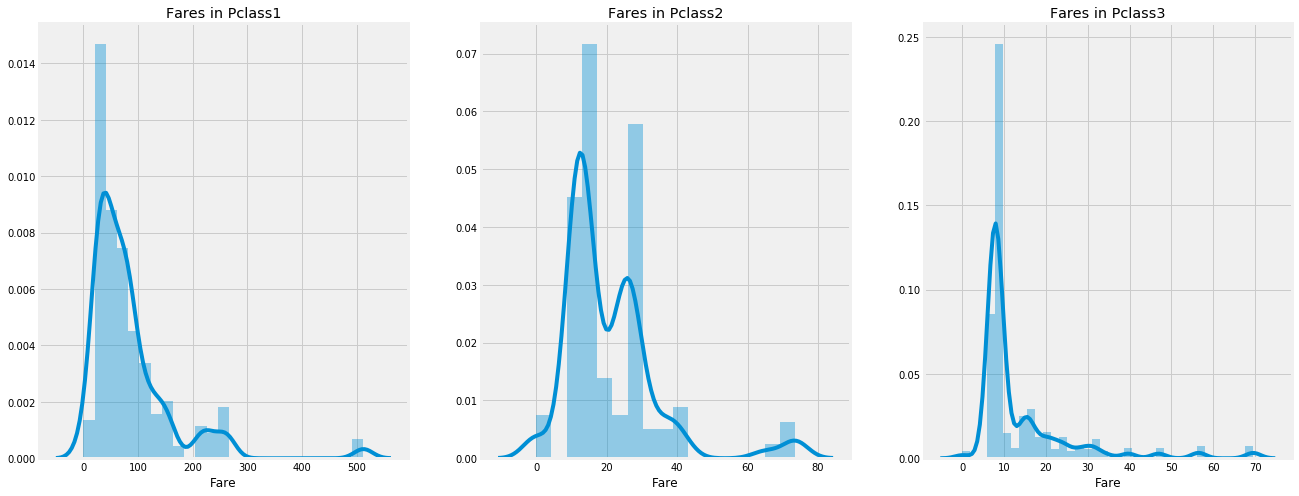

In [33]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))

for index in range(3):
    sns.distplot(data[data["Pclass"] == (index + 1)].Fare, ax=ax[index])
    ax[index].set_title(f"Fares in Pclass{index + 1}")

plt.show()

## Correlation Between The Feature

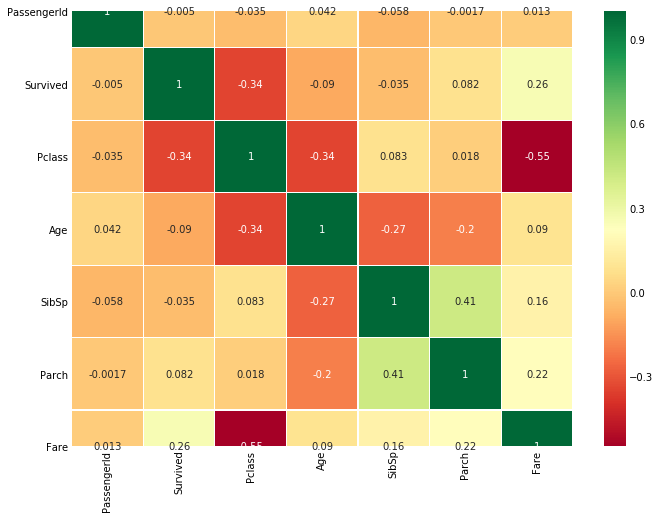

In [34]:
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

# Part2: Feature Engineering and Data Cleaning

## Age_band

In [38]:
data["Age_band"] = 0

age_bins = [0, 16, 32 ,48, 64, 99]
age_band = [0, 1, 2, 3, 4]

data["Age_band"] = pd.cut(data["Age"], age_bins, labels=age_band)

In [40]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [41]:
data["Age_band"].value_counts().to_frame().style.background_gradient(cmap="summer")

,Age_band
1,382
2,325
0,104
3,69
4,11


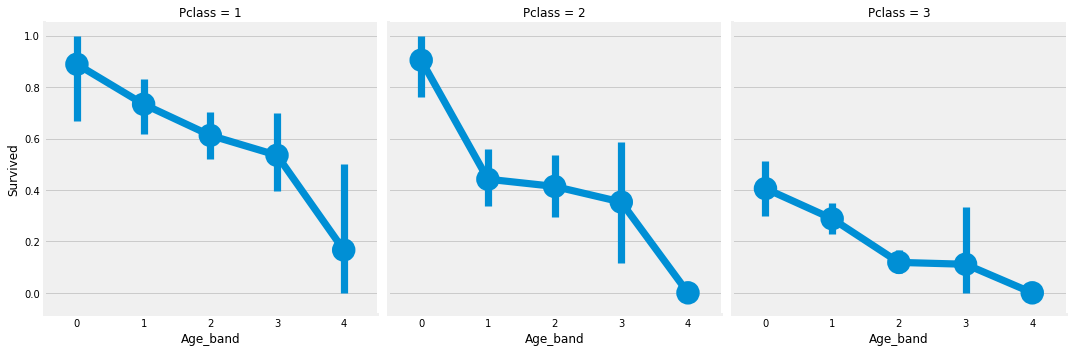

In [42]:
sns.factorplot("Age_band", "Survived", data=data, col="Pclass")
plt.show()

## Family_Size and Alone

In [44]:
data["Family_Size"] = 0
data["Family_Size"] = data["Parch"] + data["SibSp"]

data["Alone"] = 0
data.loc[data.Family_Size == 0, "Alone"] = 1

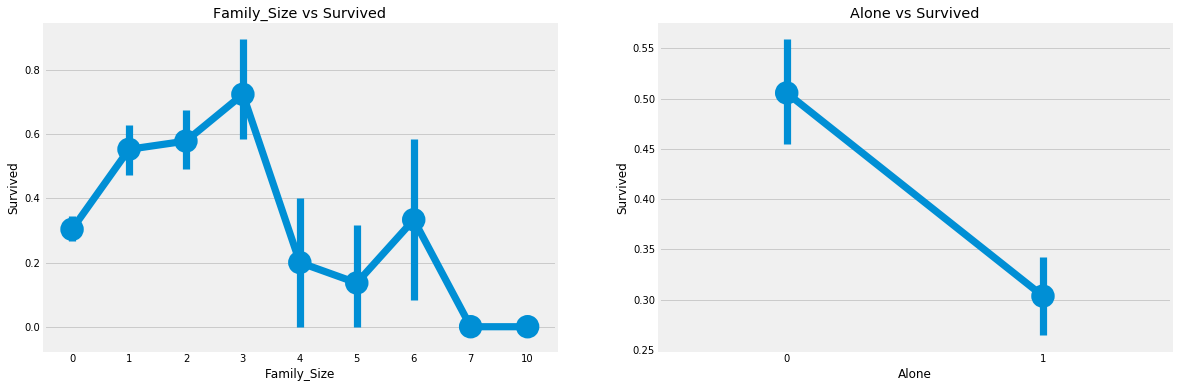

In [46]:
f, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.factorplot("Family_Size", "Survived", data=data, ax=ax[0])
ax[0].set_title("Family_Size vs Survived")

sns.factorplot("Alone", "Survived", data=data, ax=ax[1])
ax[1].set_title("Alone vs Survived")

plt.close(2)
plt.close(3)
plt.show()

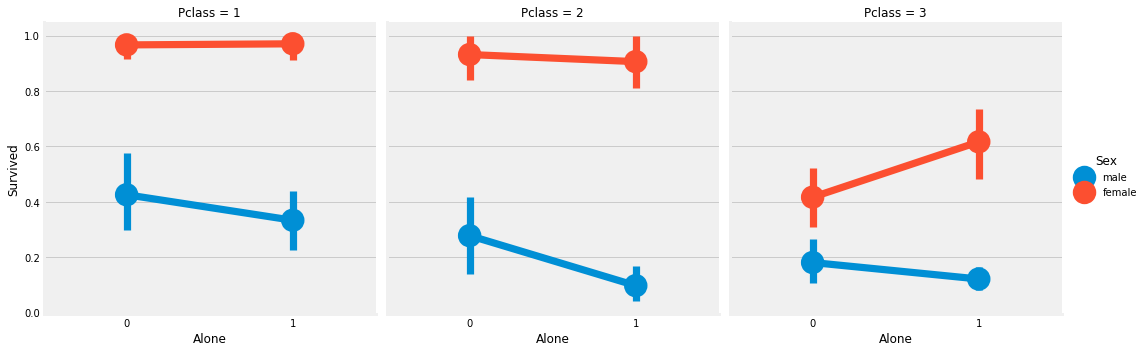

In [47]:
sns.factorplot("Alone", "Survived", data=data, hue="Sex", col="Pclass")
plt.show()

## Fare_Range

In [48]:
data["Fare_Range"] = pd.qcut(data["Fare"], 4)
data.groupby(["Fare_Range"])["Survived"].mean().to_frame().style.background_gradient(cmap="summer_r")

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [131]:
data["Fare_cat"] = 0
data.loc[data["Fare"] <= 7.91, "Fare_cat"] = 0
data.loc[(data["Fare"] > 7.91) & (data["Fare"] <= 14.454), "Fare_cat"] = 1
data.loc[(data["Fare"] > 14.454) & (data["Fare"] <= 31), "Fare_cat"] = 2
data.loc[(data["Fare"] > 31) & (data["Fare"] <= 513), "Fare_cat"] = 3

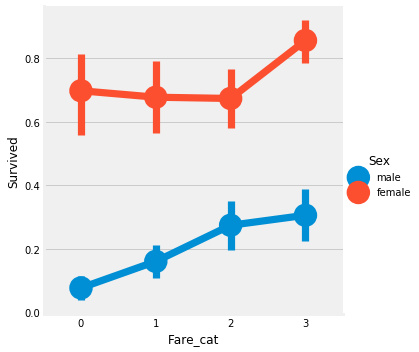

In [132]:
sns.factorplot("Fare_cat", "Survived", data=data, hue="Sex")
plt.show()

## Converting String Values into Numeric

In [136]:
data["Sex"].replace(["male", "female"], [0, 1], inplace=True)
data["Embarked"].replace({ v : i for i, v in enumerate(data["Embarked"].unique())}, inplace=True)
data["Initial"].replace({ v : i for i, v in enumerate(data["Initial"].unique())}, inplace=True)

#### Dropping UnNeeded Features

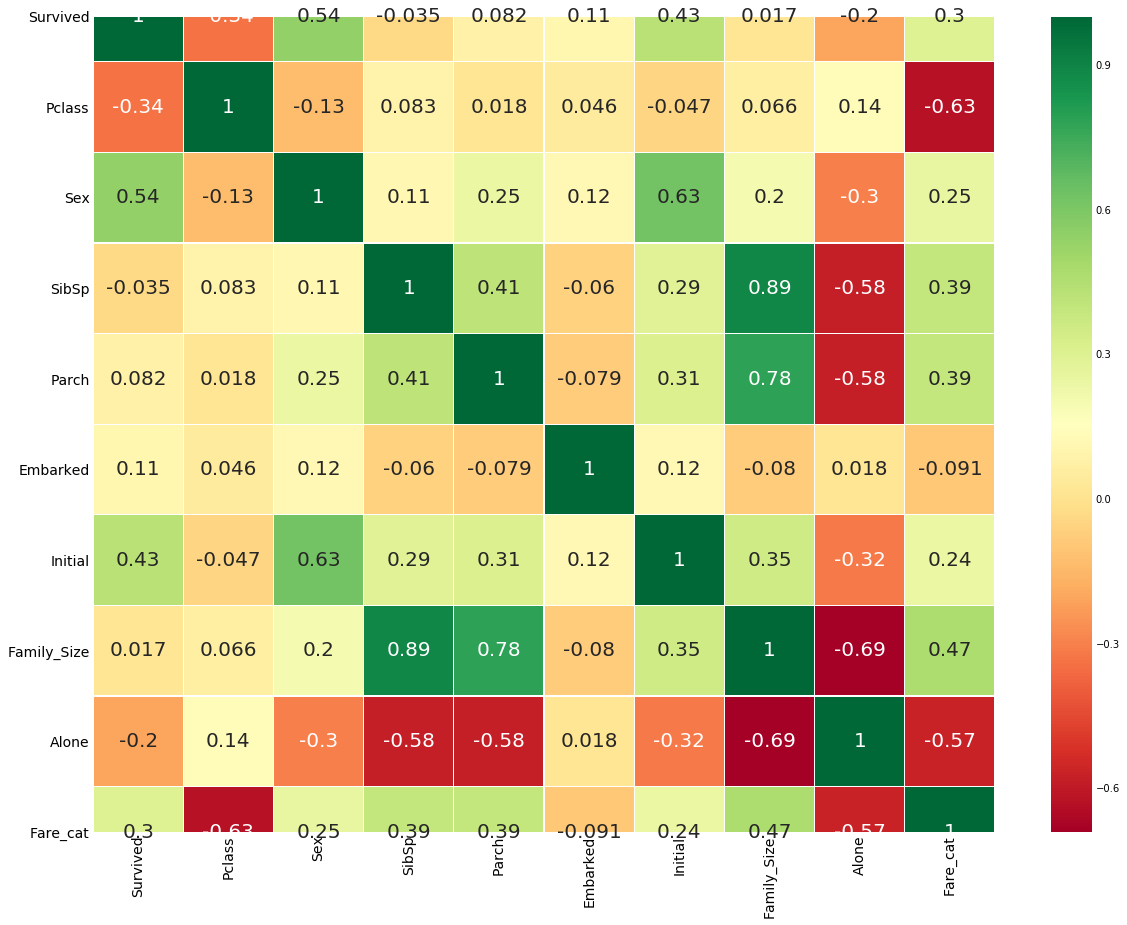

In [137]:
data.drop(["Name", "Age", "Ticket", "Fare", "Cabin", "Fare_Range", "PassengerId"], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", linewidths=0.2, annot_kws={"size":20})
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Part3: Predictive Modeling

In [138]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [139]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data["Survived"])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]

X = data[data.columns[1:]]
Y = data["Survived"]

In [141]:
model = svm.SVC(kernel="rbf", C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


In [142]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


In [143]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8171641791044776


In [144]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8022388059701493


In [145]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.832089552238806


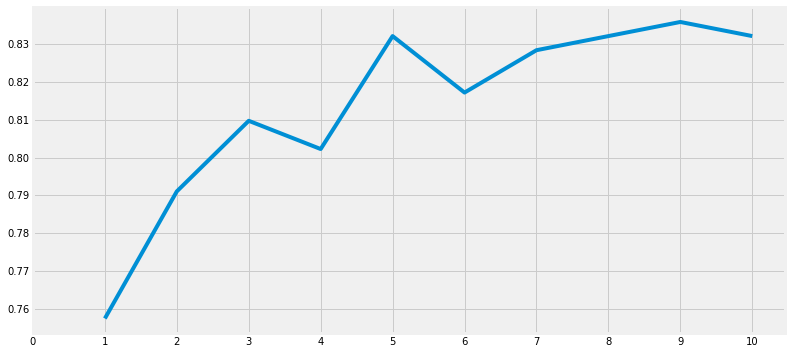

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [146]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [147]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


In [148]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8208955223880597


## Cross Validation

In [151]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
kfold = KFold(n_splits=10, random_state=22)
xyz=[]
accuracy=[]
std=[]
classifiers=["Linear Svm", "Radial Svm", "Logistic Regression", "KNN", "Decision Tree", "Naive Bayes", "Random Forest"]
models = [svm.SVC(kernel="linear"), svm.SVC(kernel="rbf"), LogisticRegression(), KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv = kfold, scoring = "accuracy")
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_model_dataframe2=pd.DataFrame({"CV Mean":xyz, "Std":std}, index=classifiers)
new_model_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.021861
KNN,0.813783,0.041210
Decision Tree,0.805868,0.028190
Naive Bayes,0.801386,0.028999
Random Forest,0.821586,0.036862


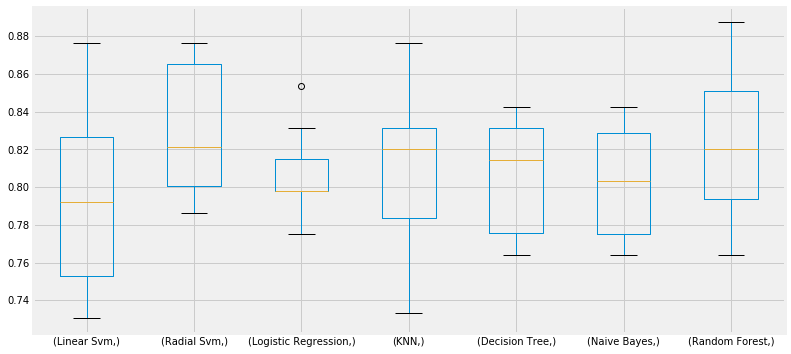

In [152]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

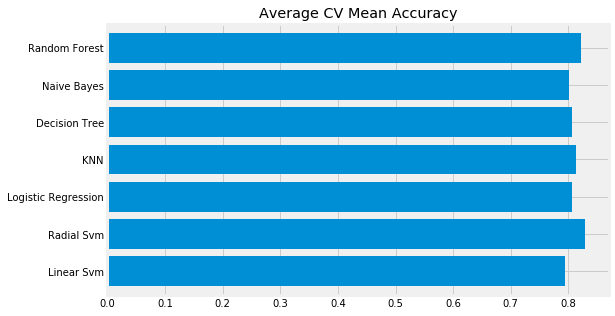

In [155]:
new_model_dataframe2["CV Mean"].plot.barh(width=0.8)
plt.title("Average CV Mean Accuracy")
fig=plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

## Confusion Matrix

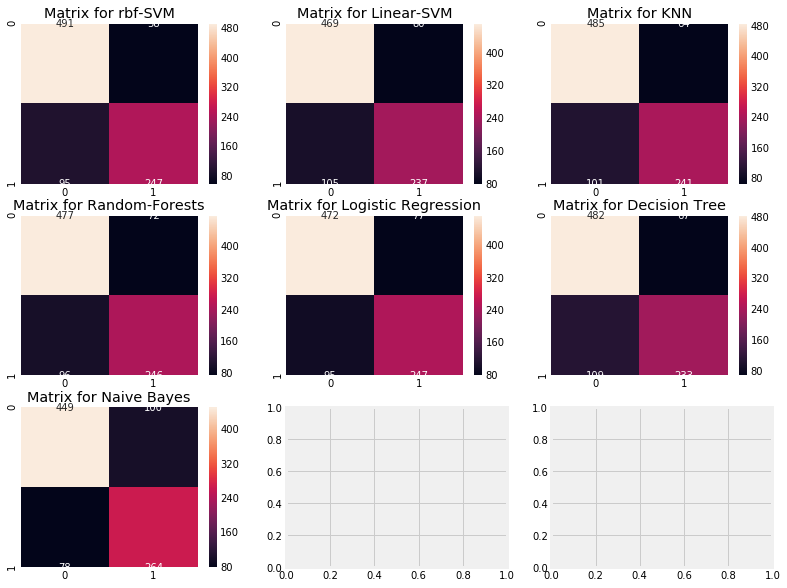

In [156]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

## Hyper-Parameters Tuning

In [157]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282828282828283
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:    8.5s finished


In [158]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   12.3s finished


0.8170594837261503
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


## Ensembling

#### Voting Classifier

In [159]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8237660310974917


#### Bagging

In [160]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.835820895522388
The cross validated score for bagged KNN is: 0.8148893428668709


In [161]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8246268656716418
The cross validated score for bagged Decision Tree is: 0.8204826353421859


#### Boosting

In [162]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249526160481218


In [163]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8182862331176939


In [165]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  4.3min finished


0.8316498316498316
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=200, random_state=None)


## Confusion Matrix for the Best Model

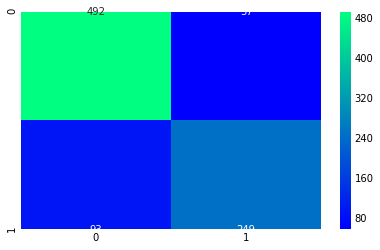

In [166]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

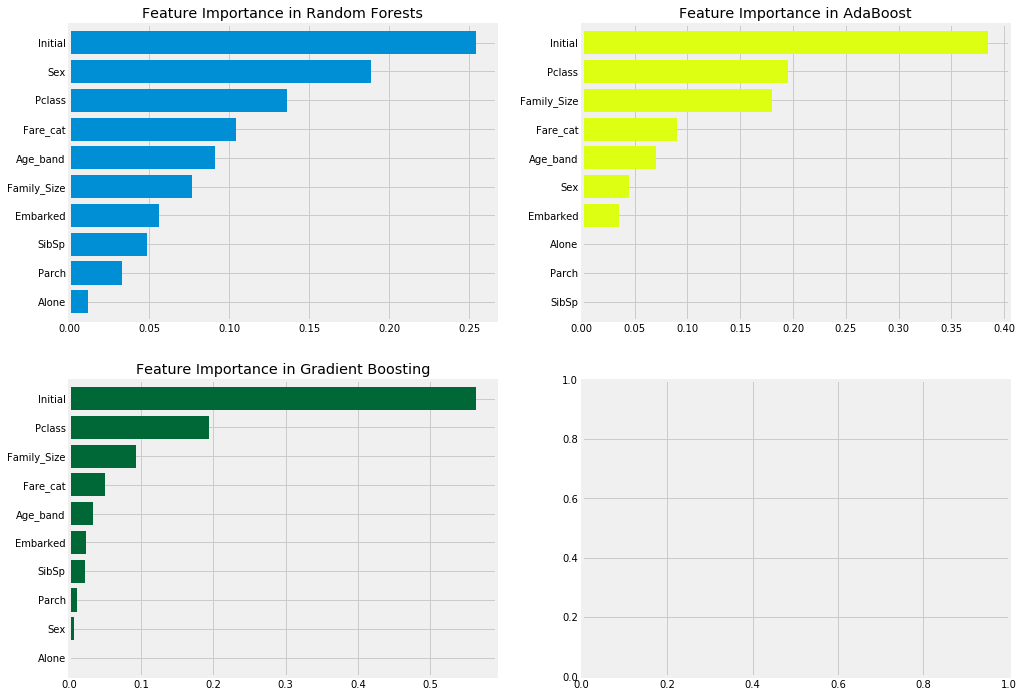

In [169]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
plt.show()

# Using test_data

In [170]:
test_data = pd.read_csv("./titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [172]:
test_data["Initial"] = 0
for _ in test_data:
    test_data["Initial"] = test_data.Name.str.extract("([A-Za-z]+)\.")

In [173]:
test_data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [174]:
test_data["Age"].fillna(
    test_data.groupby("Initial")["Age"].transform("mean"), inplace=True
)

In [175]:
test_data["Embarked"].fillna("S", inplace=True)

In [176]:
test_data["Age_band"] = 0

age_bins = [0, 16, 32 ,48, 64, 99]
age_band = [0, 1, 2, 3, 4]

test_data["Age_band"] = pd.cut(test_data["Age"], age_bins, labels=age_band)

In [177]:
test_data["Family_Size"] = 0
test_data["Family_Size"] = test_data["Parch"] + test_data["SibSp"]

test_data["Alone"] = 0
test_data.loc[test_data.Family_Size == 0, "Alone"] = 1

In [180]:
test_data["Fare_Range"] = pd.qcut(test_data["Fare"], 4)
test_data["Fare_cat"] = 0
test_data.loc[test_data["Fare"] <= 7.91, "Fare_cat"] = 0
test_data.loc[(test_data["Fare"] > 7.91) & (test_data["Fare"] <= 14.454), "Fare_cat"] = 1
test_data.loc[(test_data["Fare"] > 14.454) & (test_data["Fare"] <= 31), "Fare_cat"] = 2
test_data.loc[(test_data["Fare"] > 31) & (test_data["Fare"] <= 513), "Fare_cat"] = 3

In [181]:
test_data["Sex"].replace(["male", "female"], [0, 1], inplace=True)
test_data["Embarked"].replace({ v : i for i, v in enumerate(test_data["Embarked"].unique())}, inplace=True)
test_data["Initial"].replace({ v : i for i, v in enumerate(test_data["Initial"].unique())}, inplace=True)

In [182]:
test_data.drop(["Name", "Age", "Ticket", "Fare", "Cabin", "Fare_Range", "PassengerId"], axis=1, inplace=True)

In [183]:
test_data

,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,3,0,0,0,0,0,2,0,1,0
1,3,1,1,0,1,1,2,1,0,0
2,2,0,0,0,0,0,3,0,1,1
3,3,0,0,0,1,0,1,0,1,1
4,3,1,1,1,1,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,0,1,0,2,0,1,1
414,1,1,0,0,2,5,2,0,1,3
415,3,0,0,0,1,0,2,0,1,0
416,3,0,0,0,1,0,2,0,1,1


In [188]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
ada.fit(X, Y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=200, random_state=0)

In [190]:
result = ada.predict(test_data)

In [207]:
pid = pd.read_csv("./titanic/test.csv").PassengerId

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

In [216]:
answer = np.concatenate( (pid.to_numpy().reshape(-1, 1),
                          result.reshape(-1, 1)), axis = 1)

In [218]:
df_submission = pd.DataFrame(answer, columns=["PassegerId", "Survived"])
df_submission

,PassegerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [219]:
df_submission.to_csv("k01_submission_result.csv", index=False)